###### From the problem, it seems like we might need to predict a continuous variable from a set of other independent variables. 

Before jumping into the aspect of solving the problem through a predictive model, it is necessary to understand the purpose of the model from the client and the reason behind it. Further, it is important to understand who the end user is for this predictions. Is it the manager or the client itself?

From that point, how the client has been currently doing it is required for us to compare or benchmark something with. If the pointed model does not contribute towards the betterment, it would always be better to shed the energy and resources to other projects where there would be a better ROI.

In addition, the main aim for utilising this model from the client's business context is to be understood so as to analyse how the model accuracy impact the business metric. 

Assuming that these decisions have been taken care off and we have a better ROI for both client and our company, the analysis and modelling has been carried out.

In [40]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [17]:
df = pd.read_csv("/Users/admin/Downloads/wb-data-science-test/VesselData.csv")

In [18]:
df.head()

,eta,ata,atd,vesseldwt,vesseltype,discharge1,load1,discharge2,load2,discharge3,...,load4,stevedorenames,hasnohamis,earliesteta,latesteta,traveltype,previousportid,nextportid,isremarkable,vesselid
0,2017-09-19 00:00:00+00,2017-09-19 00:00:00+00,2017-09-22 00:00:00+00,109290.0,5,0,0,0,0,90173,...,0,Stevedore_104,NaN,2017-09-19 00:00:00+00,2017-09-19 00:00:00+00,ARRIVAL,981,731,f,2242
1,2017-10-02 00:00:00+00,2017-10-02 00:00:00+00,2017-10-03 00:00:00+00,67170.0,3,0,0,0,0,0,...,0,Stevedore_109,NaN,2017-10-02 00:00:00+00,2017-10-02 00:00:00+00,ARRIVAL,19,15,f,5462
2,2017-09-30 00:00:00+00,2017-09-30 00:00:00+00,2017-10-01 00:00:00+00,67737.0,3,0,0,0,0,0,...,0,Stevedore_57,NaN,2017-09-30 00:00:00+00,2017-09-30 00:00:00+00,ARRIVAL,19,19,f,5251
3,2017-10-02 00:00:00+00,2017-10-02 00:00:00+00,2017-10-03 00:00:00+00,43600.0,3,0,0,0,0,0,...,0,Stevedore_57,NaN,2017-10-02 00:00:00+00,2017-10-02 00:00:00+00,ARRIVAL,15,18,f,5268
4,2017-10-02 00:00:00+00,2017-10-02 00:00:00+00,2017-10-02 00:00:00+00,9231.0,3,0,0,0,0,0,...,0,Stevedore_98,NaN,2017-10-02 00:00:00+00,2017-10-02 00:00:00+00,ARRIVAL,74,27,f,5504


Labelling of numbers associated with discharge and load
* 1 - Ore
* 2 - Coal
* 3 - Oil
* 4 - Petroleum

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8208 entries, 0 to 8207
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   eta             8208 non-null   object 
 1   ata             8208 non-null   object 
 2   atd             8208 non-null   object 
 3   vesseldwt       8206 non-null   float64
 4   vesseltype      8208 non-null   int64  
 5   discharge1      8208 non-null   int64  
 6   load1           8208 non-null   int64  
 7   discharge2      8208 non-null   int64  
 8   load2           8208 non-null   int64  
 9   discharge3      8208 non-null   int64  
 10  load3           8208 non-null   int64  
 11  discharge4      8208 non-null   int64  
 12  load4           8208 non-null   int64  
 13  stevedorenames  8206 non-null   object 
 14  hasnohamis      0 non-null      float64
 15  earliesteta     8208 non-null   object 
 16  latesteta       8208 non-null   object 
 17  traveltype      8208 non-null   o

From a ML model perspective, 8000 values seems to be pretty low for the model to have a high accuracy. We could potentially as our client with more data for getting higher accuracy. Or it is necessary for us to inform the ability of the predictions could relatively be low at the start and would increase with more data. 

hasnohamis column could be seen to have 0 non null values and hence could be removed from the data set

In [20]:
df = df.drop(['hasnohamis'], axis=1)

Date types are objects and hence converting them to date time

In [21]:
df['eta'] =  pd.to_datetime(df['eta'])
df['ata'] =  pd.to_datetime(df['ata'])
df['atd'] =  pd.to_datetime(df['atd'])
df['earliesteta'] =  pd.to_datetime(df['earliesteta'])
df['latesteta'] =  pd.to_datetime(df['latesteta'])

Finding the value counts of different variables and could convert from int to categorical

In [22]:
df['vesseltype'].value_counts()

3    5175
5    2621
2     387
4      23
1       2
Name: vesseltype, dtype: int64

In [26]:
df['traveltype'].value_counts()

ARRIVAL    5947
SHIFT      2261
Name: traveltype, dtype: int64

# Converting int to categorical variables

In [28]:
df['traveltype']=df['traveltype'].replace({'ARRIVAL': 0, 'SHIFT': 1})

In [31]:
df[['vesseltype','traveltype']]=df[['vesseltype','traveltype']].astype('category')

# Data analysis to analyse potential patterns within existing data

Data analysis is carried out here so as to find potential patterns. If exists, new features could be built to make the model more robust. Further, more group_by and value_counts could be used here.

##### Using groupby and value counts

In [32]:
round(df.groupby(['vesseltype']).mean(),2)

,vesseldwt,discharge1,load1,discharge2,load2,discharge3,load3,discharge4,load4,previousportid,nextportid,vesselid
vesseltype,,,,,,,,,,,,
1,99984.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,882.00,35.50,7311.50
2,94697.27,36487.40,1000.55,24644.80,201.66,0.00,0.00,624.46,0.00,522.37,521.11,4538.86
3,33609.40,19.61,21.54,10.65,15.67,0.00,0.00,9.58,7.25,323.47,352.88,4568.89
4,58623.96,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,675.43,765.13,6420.74
5,37845.34,0.00,0.00,0.00,0.00,15004.67,140.13,5590.90,4711.47,427.24,409.56,3826.26


It could be seen that vessel 2 has been functioning predominantly with ore and coal cargo types. While vessel 5 has been associated with oil and petroleum. Vessel 1 and 4 could be seen as vessels which does not load or discharge any cargo type in this port (could even be potentially dropped as they do not get discharged or loaded and the number of times they arrive is also quite limited compared to other vessels).

Further, vessel three which seems to arrive many times to this port has the least load and discharge whilst focusing on ore, coal, and petroelum cargo types. 

In [35]:
round(df.groupby(['traveltype']).mean(),2)

,vesseldwt,discharge1,load1,discharge2,load2,discharge3,load3,discharge4,load4,previousportid,nextportid,vesselid
traveltype,,,,,,,,,,,,
0,44993.96,2312.88,74.66,1551.32,21.51,5658.31,15.3,1686.86,1383.17,369.94,374.87,4333.84
1,19352.89,206.73,24.17,162.30,13.81,2510.97,122.2,2173.04,1840.13,359.64,393.45,4342.39


Not much could be inferred except for the fact that SHIFT travel type has a lower vessel deadweight tonnage compared to the ARRIVAL travel type. 

This could be furthered by combining both travel type and the vessel type in obtaining the summary of load, discharges and vessel deadweight.

Potentially creating columns and specifiying 1 based on type of discharge for each of the vessels would potentially be the next step.

In [ ]:
df of ore =np.where((df['vesseltype']=='2')&&(df['discharge1']> 0)|(df['load1']>0,1,0)
df of coal =np.where((df['vesseltype']=='2')&&(df['discharge2']> 0)|(df['load2']>0,1,0)

Similarly creating new columns based on inferences from previous analysis could be carried out. So each of those variables will also be categorical. 

##### Visualisations on date aspect

To analyse whether weekday or weekend has a better total of load and discharge for any of the vessels. For that we might need to add another variable stating whether the day is a weekend or a weekday.

In [ ]:
df['weekday_eta'] = np.where((df['eta']).dt.dayofweek) < 5,0,1)

We convert each of the datetime based on day of the week indexes and label them as 0 for weekday and 1 for weekend. If they are not categorical we convert them to categorical

In [ ]:
df['weekday_eta'] = df['weekday_eta'].astype('category')

We also create the weekday index like Sat = 0, Mon =1..... Sun = 6. Using those index, we plot the count of vesseltypes arrived based on arrival time, departure time & first entry to port. 

In [ ]:
df of column.value_counts().plot.bar()

If a particular vessel has a higher quantity of load and discharges during weekend or weekday, that is another valuable insight for us to use in the model.

Next is to analyse the total of load and discharge of vessels during weekdays and weekends. Average of weekday load and discharge is taken and compared to the weekends for.This is to obtain an understanding whether weekday or weekend paves way for higher load and discharge

In [ ]:
groupby(created column for weekday or weekend).mean().boxplot()

# Relationships between variables 

Finding relationship between different variables is required and to analyse how they are correlated with each other.

In [36]:
df.corr()

,vesseldwt,discharge1,load1,discharge2,load2,discharge3,load3,discharge4,load4,previousportid,nextportid,vesselid
vesseldwt,1.000000,0.256594,0.005130,0.197749,0.003393,0.463775,0.029530,0.112079,0.181058,0.176019,0.027413,0.192800
discharge1,0.256594,1.000000,0.005336,-0.010967,-0.003098,-0.020084,-0.001549,-0.019293,-0.013442,0.017623,0.027934,-0.013210
load1,0.005130,0.005336,1.000000,-0.004728,-0.001336,-0.008659,-0.000668,-0.008318,-0.005795,-0.004226,0.024620,0.028272
discharge2,0.197749,-0.010967,-0.004728,1.000000,-0.003006,-0.019484,-0.001503,-0.018717,-0.013041,0.065806,0.056500,-0.002809
load2,0.003393,-0.003098,-0.001336,-0.003006,1.000000,-0.005505,-0.000425,-0.005085,-0.003684,-0.000561,-0.002970,0.000839
discharge3,0.463775,-0.020084,-0.008659,-0.019484,-0.005505,1.000000,0.109965,-0.033696,0.198799,0.155226,0.068392,-0.084307
load3,0.029530,-0.001549,-0.000668,-0.001503,-0.000425,0.109965,1.000000,-0.002643,-0.001842,0.010336,0.008800,-0.008503
discharge4,0.112079,-0.019293,-0.008318,-0.018717,-0.005085,-0.033696,-0.002643,1.000000,0.022616,0.096285,0.046903,-0.034324
load4,0.181058,-0.013442,-0.005795,-0.013041,-0.003684,0.198799,-0.001842,0.022616,1.000000,0.022158,0.017705,0.026263
previousportid,0.176019,0.017623,-0.004226,0.065806,-0.000561,0.155226,0.010336,0.096285,0.022158,1.000000,0.124984,-0.018242


vessel deadweight tonnage seems to have a medium correlation with the discharges, with discharge 3 having the highest positive correlation. Analysing them a little more with scatterplots would also be an ideal way to get an understanding.

# Selecting variables for modelling

Some of the variables would not be on the same scale. If that exists, standardising the variables is required here. Once the features are standardised, the next step is to select the variables.

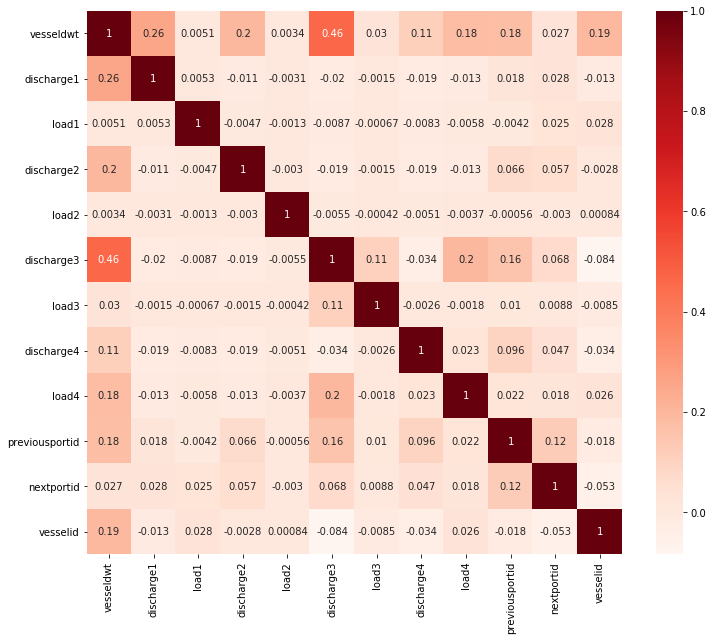

In [39]:
plt.figure(figsize=(12,10))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

Vesseldwt seems to be an interesting indicator for discharge 3 which especially is high for vessel 5. We could even label the model to make sense of vesset deadweight for vessel 5 alone by again categorising them. But, since it also has a moderate correlation with discharge1 we could use it upon standardising as it is.

In addition, there could be other categorical variables which we had developed based on analysis and visulisation. If those variables seem to be a good indicator which ofcourse was not seen in the above correlation map, we might be required to add them as a independent variable to the prediction model.

Upon selecting the necessary variables, it's time to have a Multiple Linear regression. This model, would however be built right at the start with the existing data without any feature engineering or analysis to compare it as a baseline model.

Clubbing both load and discharge would be required here as we are predicting the total of discharge and load per cargo type.

One limitation at this is stage is that the model could potentiall predict the total discharge and load, however it requires us to provide the value of the cargo type as an input.

# Building the model through train,test split method

In [ ]:
X = (independent variables)
Y = total of discharge and load
regr = linear_model.LinearRegression()
x_train, x_test,y_train,y_test=train_test_split(X,y,test_size =0.2, random_state=3)

In [ ]:
regr.fit(x_train, y_train)

At this stage we will be having the model obtained from train test. This model is evaluated with the test set which has been obtained from the previous step. We could use the MAE, MSE and R2 score for model evaluation. In general better the R2 score, better is the model's ability to predict the total discharge and load.

In [ ]:
test_yhat=regr.predict(x_test)
print("MAE is %2f"%np.mean(np.absolute(test_yhat - y_test)))
print("Rw: %2f"%r2_score(test_yhat,test_y)

Based on the value obtained we ofcourse might be required to either increase the accuracy based on the standards we describe at the start. Further, it is necessary to understand this impact from a business metric perspective for our client. Comparing it with the costs would provide us a better way of evaluting whether the accuracy suits our client. 

Additionally, tuning the model from this stage based on variables or including ridge expressions to better the model might be required depending on the business outcome. 

Additionally, during the initial stages we could potentially include the stevedorenames also to analysis to get an understanding of any biases they create with respect to vessel numbers.